In [1]:
# Лабораторная работа 1
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel(r"C:\Users\Cyber\Downloads\daily-weather-dataset_chronological-order.xlsx", sheet_name="daily")

In [3]:
data.tail()

Date  Cloud coverage  Visibility  Temperature  Dew point  \
632 2017-10-25            0.23       10.00         5.87       2.89   
633 2017-10-26            0.01       10.00        10.59       5.32   
634 2017-10-27            0.89       10.00         5.79       0.04   
635 2017-10-28            0.99        9.67         3.43      -0.11   
636 2017-10-29            0.58       10.00         4.96      -0.90   

     Relative humidity  Wind speed  Station pressure  Altimeter  Solar energy  \
632              82.33        5.56             29.04      29.83         13737   
633              72.74        9.61             28.97      29.76         27465   
634              67.37       13.62             29.08      29.87         15797   
635              77.87        9.67             29.15      29.94          6400   
636              67.58        5.53             29.07      29.86          8537   

     (Inverters)  
632          NaN  
633          NaN  
634          NaN  
635          NaN  
636          NaN

In [4]:
data.head()

Date  Cloud coverage  Visibility  Temperature  Dew point  \
0 2016-02-01            0.10        9.45         3.11       0.32   
1 2016-02-02            0.80        3.94         6.99       6.22   
2 2016-02-03            0.87        8.70         1.62       0.02   
3 2016-02-04            0.37       10.00        -2.47      -5.89   
4 2016-02-05            0.52        9.21        -2.00      -4.15   

   Relative humidity  Wind speed  Station pressure  Altimeter  Solar energy  \
0              79.46        4.70             29.23      30.02         20256   
1              93.60       13.29             28.91      29.70          1761   
2              85.00       16.73             29.03      29.82          2775   
3              74.52        9.46             29.46      30.26         28695   
4              82.03        5.92             29.55      30.35          9517   

   (Inverters)  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [5]:
data.shape # Параметр .shape показывает размерность датафрейма

(637, 11)

In [6]:
data.size  # Параметр .size показывает количество элементов в датафрейме

7007

In [7]:
data.count() # Метод count считает сколько всего непустых записей в каждом столбце

Date                 637
Cloud coverage       637
Visibility           637
Temperature          637
Dew point            637
Relative humidity    637
Wind speed           637
Station pressure     637
Altimeter            637
Solar energy         637
(Inverters)            0
dtype: int64

In [8]:
data.info() # Метод .info() показывает тип каждого столбца и занимаемую память

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               637 non-null    datetime64[ns]
 1   Cloud coverage     637 non-null    float64       
 2   Visibility         637 non-null    float64       
 3   Temperature        637 non-null    float64       
 4   Dew point          637 non-null    float64       
 5   Relative humidity  637 non-null    float64       
 6   Wind speed         637 non-null    float64       
 7   Station pressure   637 non-null    float64       
 8   Altimeter          637 non-null    float64       
 9   Solar energy       637 non-null    int64         
 10  (Inverters)        0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 54.9 KB


In [9]:
data.dtypes # Параметр .dtypes показывает просто тип каждого столбца

Date                 datetime64[ns]
Cloud coverage              float64
Visibility                  float64
Temperature                 float64
Dew point                   float64
Relative humidity           float64
Wind speed                  float64
Station pressure            float64
Altimeter                   float64
Solar energy                  int64
(Inverters)                 float64
dtype: object

In [10]:
data.isna().head() # Метод .isna() вместо каждого значения подставит True (значение NaN) или False (действительное значение)

Date  Cloud coverage  Visibility  Temperature  Dew point  \
0  False           False       False        False      False   
1  False           False       False        False      False   
2  False           False       False        False      False   
3  False           False       False        False      False   
4  False           False       False        False      False   

   Relative humidity  Wind speed  Station pressure  Altimeter  Solar energy  \
0              False       False             False      False         False   
1              False       False             False      False         False   
2              False       False             False      False         False   
3              False       False             False      False         False   
4              False       False             False      False         False   

   (Inverters)  
0         True  
1         True  
2         True  
3         True  
4         True

In [11]:
data.isna().sum() # Подсчитаем количество пропусков в каждом столбце с помощью метода .sum()

Date                   0
Cloud coverage         0
Visibility             0
Temperature            0
Dew point              0
Relative humidity      0
Wind speed             0
Station pressure       0
Altimeter              0
Solar energy           0
(Inverters)          637
dtype: int64

In [12]:
proc = data.isna().sum().sum() # Подсчитаем сколько всего пропусков (во всех столбцах) в нашем датафрейме
print(proc) # Отобразим количество посчитанных пропусков

637


In [13]:
proc = data.isna().sum().sum() / data.size
print(round(100*proc,1), '%', sep='')

9.1%


In [14]:
df = pd.DataFrame(data)
# Функция для удаления выбросов по IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Удаляем выбросы из указанных столбцов
columns_to_clean = ["Cloud coverage"]
for col in columns_to_clean:
    df = remove_outliers(df, col)

In [15]:
df = df.dropna(axis=1, how='all')

In [16]:
df

Date  Cloud coverage  Visibility  Temperature  Dew point  \
0   2016-02-01            0.10        9.45         3.11       0.32   
1   2016-02-02            0.80        3.94         6.99       6.22   
2   2016-02-03            0.87        8.70         1.62       0.02   
3   2016-02-04            0.37       10.00        -2.47      -5.89   
4   2016-02-05            0.52        9.21        -2.00      -4.15   
..         ...             ...         ...          ...        ...   
632 2017-10-25            0.23       10.00         5.87       2.89   
633 2017-10-26            0.01       10.00        10.59       5.32   
634 2017-10-27            0.89       10.00         5.79       0.04   
635 2017-10-28            0.99        9.67         3.43      -0.11   
636 2017-10-29            0.58       10.00         4.96      -0.90   

     Relative humidity  Wind speed  Station pressure  Altimeter  Solar energy  
0                79.46        4.70             29.23      30.02         20256  
1                93.60       13.29             28.91      29.70          1761  
2                85.00       16.73             29.03      29.82          2775  
3                74.52        9.46             29.46      30.26         28695  
4                82.03        5.92             29.55      30.35          9517  
..                 ...         ...               ...        ...           ...  
632              82.33        5.56             29.04      29.83         13737  
633              72.74        9.61             28.97      29.76         27465  
634              67.37       13.62             29.08      29.87         15797  
635              77.87        9.67             29.15      29.94          6400  
636              67.58        5.53             29.07      29.86          8537  

[637 rows x 10 columns]

In [17]:
#3 Для прогнозирования солнечной генерации применена группировка по месяцу и времени года – чтобы учитывать сезонность выработки.
df["Date"] = pd.to_datetime(df["Date"]) # Преобразуем столбец 'Date' в формат datetime
df["Month"] = df["Date"].dt.month # Добавляем столбец 'Month' для группировки по месяцам
df_monthly = df.groupby("Month").mean() # Группируем по месяцу и вычисляем средние значения
df_monthly

Date  Cloud coverage  Visibility  Temperature  \
Month                                                                          
1     2017-01-16 00:00:00.000000000        0.687742    7.680968     0.146452   
2     2016-08-12 13:03:09.473684224        0.423684    8.660526     2.729649   
3     2016-09-14 12:00:00.000000000        0.542581    9.097419     7.259194   
4     2016-10-15 00:00:00.000000000        0.396667    9.203000    13.006167   
5     2016-11-14 12:00:00.000000000        0.446452    9.303548    16.790645   
6     2016-12-15 00:00:00.000000000        0.219667    9.825000    23.397833   
7     2017-01-14 12:00:00.000000000        0.278387    9.307903    23.754516   
8     2017-02-14 12:00:00.000000000        0.301129    9.263548    22.407581   
9     2017-03-17 00:00:00.000000000        0.254167    9.388500    20.630000   
10    2017-04-09 22:24:00.000000000        0.448167    9.266667    15.293833   
11    2016-11-15 12:00:00.000000000        0.314667    9.013333     8.101667   
12    2016-12-16 00:00:00.000000000        0.414839    8.570645    -1.561613   

       Dew point  Relative humidity  Wind speed  Station pressure  Altimeter  \
Month                                                                          
1      -1.628387          84.665161   10.528387         28.890968  29.995806   
2      -1.013509          73.327719   11.018596         28.312982  30.000526   
3       2.613871          71.472097   11.134194         28.809194  30.052903   
4       6.923000          66.402167   10.915000         28.443167  29.973167   
5      10.736452          68.398548    9.848226         28.842258  29.938387   
6      15.834333          62.523667    8.042000         28.805833  29.962833   
7      20.100484          77.979839    5.844032         29.003548  30.013548   
8      19.088548          78.080000    5.187258         28.926290  30.035806   
9      15.539000          71.862333    6.077667         28.925000  30.063333   
10     10.986333          75.572833    8.214667         29.103833  30.065167   
11      5.137333          78.247333    8.321000         28.969333  30.113333   
12     -4.194194          66.080000   10.142903         24.268065  30.158710   

       Solar energy  
Month                
1       6997.387097  
2      18253.228070  
3      20158.129032  
4      22788.183333  
5      25069.661290  
6      27298.333333  
7      25919.580645  
8      26099.193548  
9      26273.516667  
10     17878.600000  
11     15866.566667  
12      9431.903226

In [18]:
#5
import matplotlib.pyplot as plt
import seaborn as sns


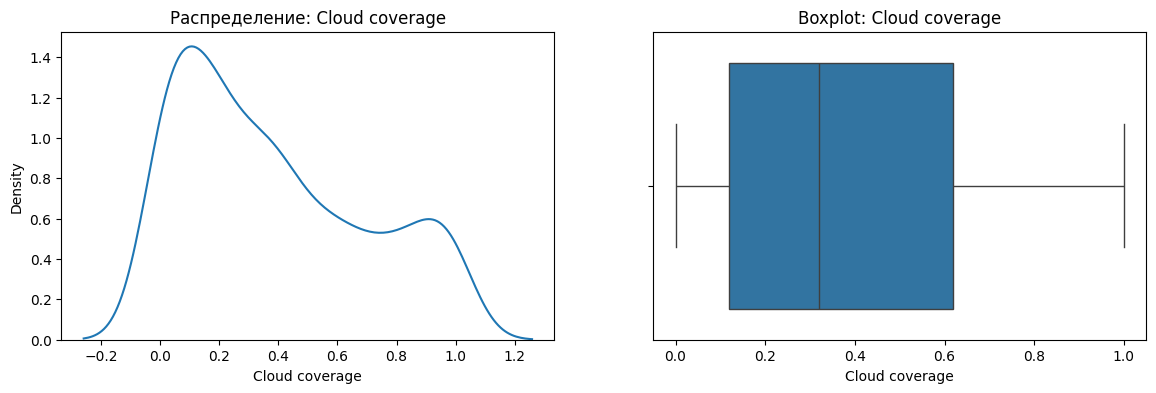

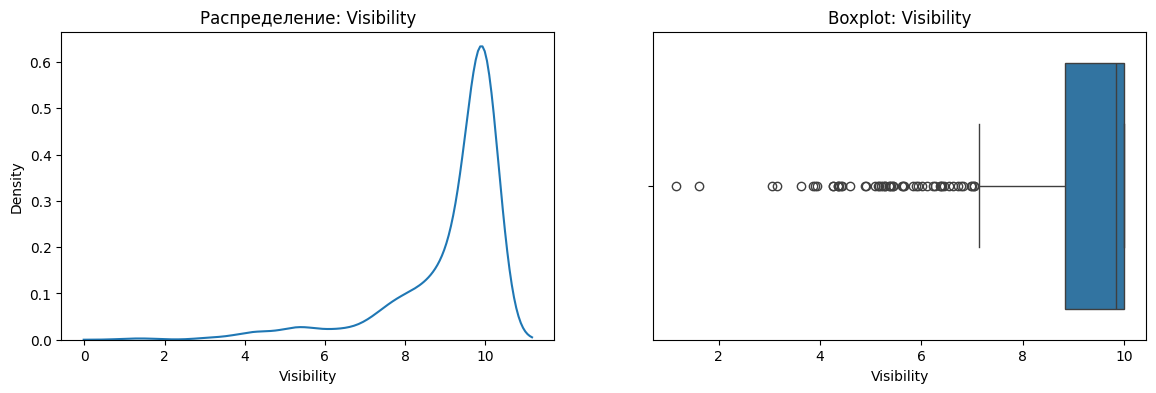

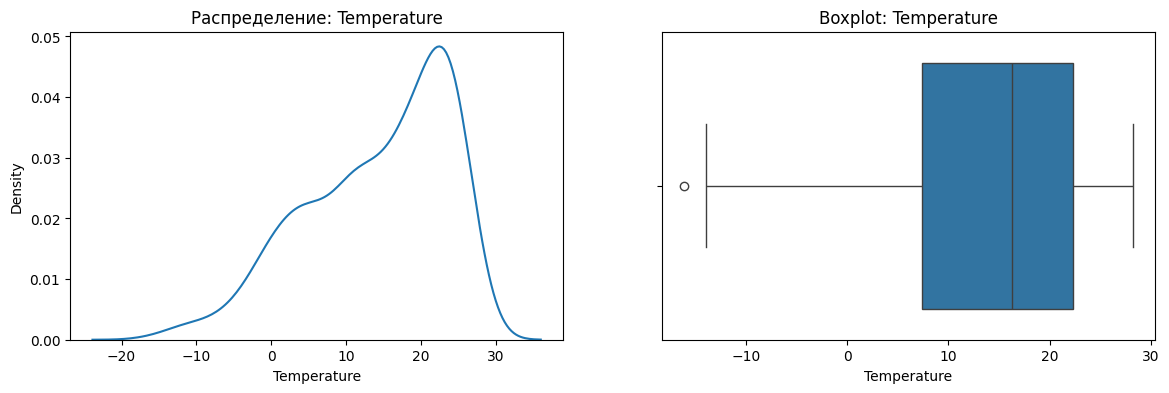

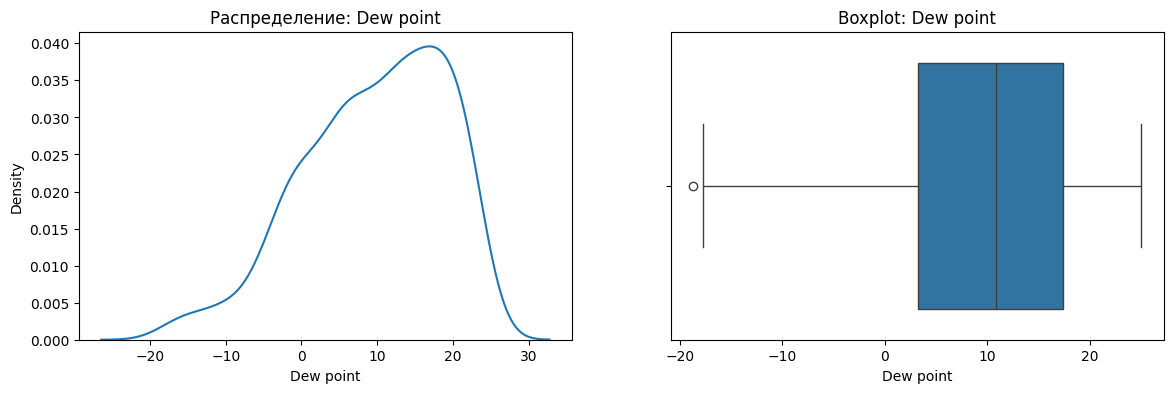

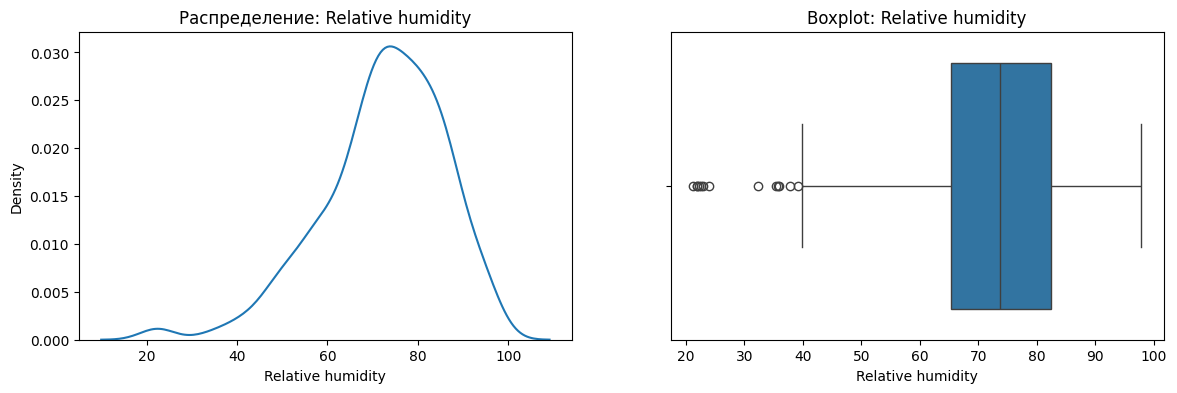

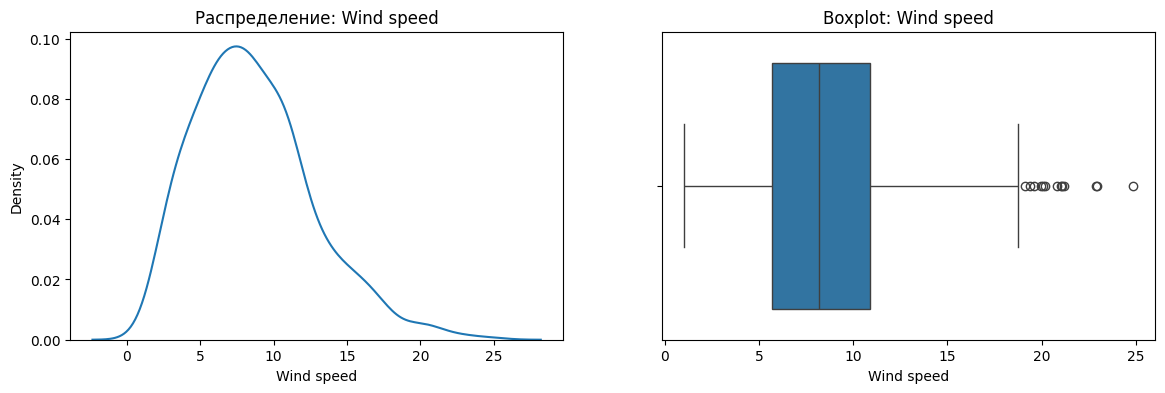

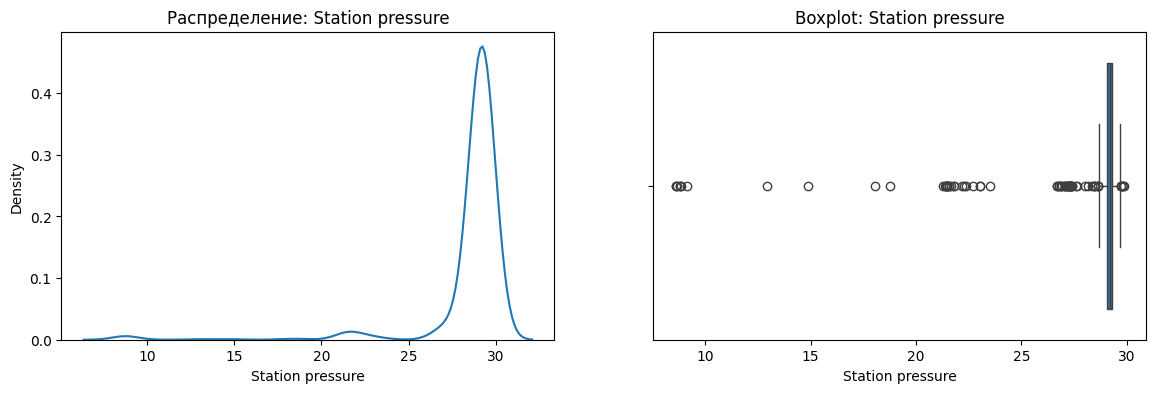

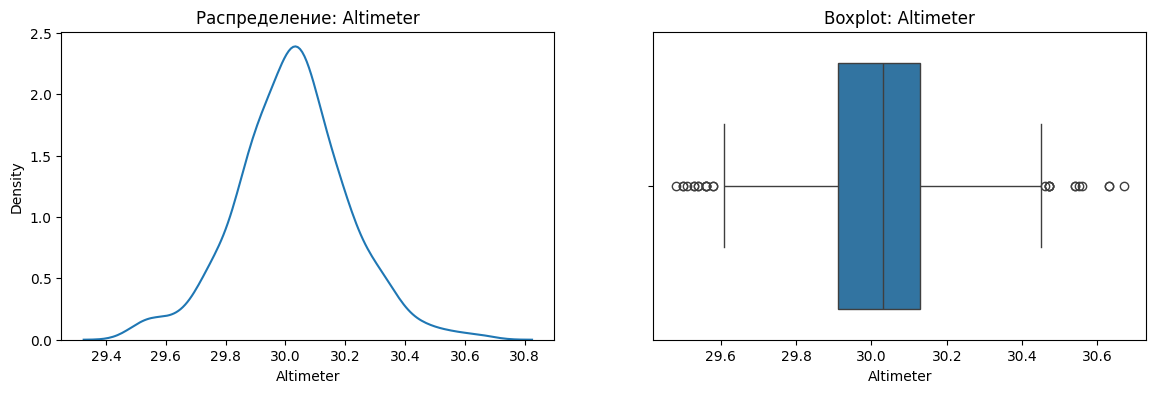

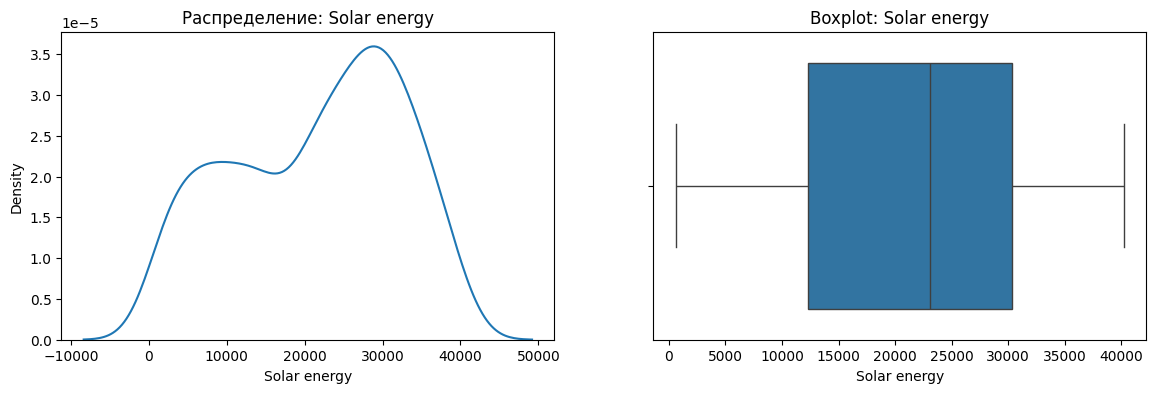

In [19]:
# 5.1 
# Выбираем числовые столбцы, исключая "Month"
numeric_features = df.select_dtypes(include=["number"]).columns
numeric_features = numeric_features.drop("Month")  # Убираем "Month"

# Строим графики для всех числовых признаков (кроме "Month")
for col in numeric_features:
    plt.figure(figsize=(14, 4))

    # График плотности (KDE)
    plt.subplot(121)
    sns.kdeplot(data=df, x=col)
    plt.title(f"Распределение: {col}")

    # Boxplot (ящик с усами)
    plt.subplot(122)
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot: {col}")

    plt.show()

#plt.figure(figsize=(8, 5))
#sns.histplot(df['Visibility'], bins=20, kde=True)
#plt.title("Гистограмма распределения параметра видимости")
#plt.show()

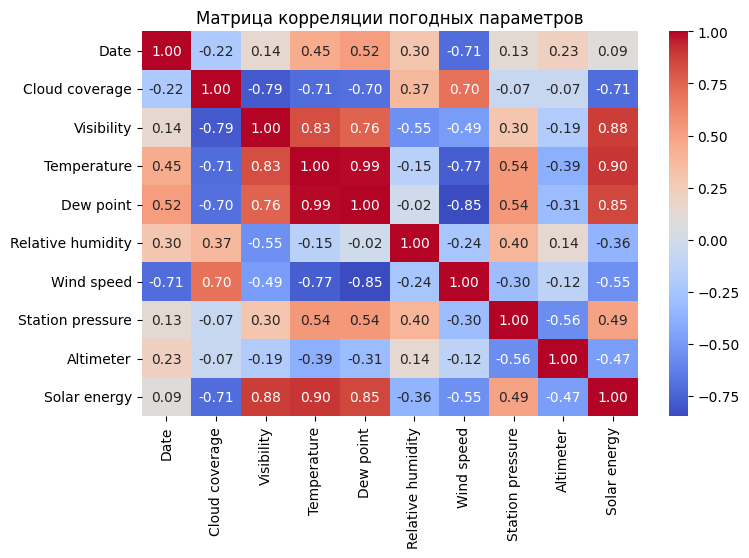

In [20]:
# 5.3. Матрица корреляции
# Позволяет увидеть, как связаны между собой числовые переменные и для поиска зависимостей между погодными параметрами
# Чем ближе значение к 1 или -1, тем сильнее положительная или отрицательная корреляция
plt.figure(figsize=(8, 5))
sns.heatmap(df_monthly.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции погодных параметров")
plt.show()

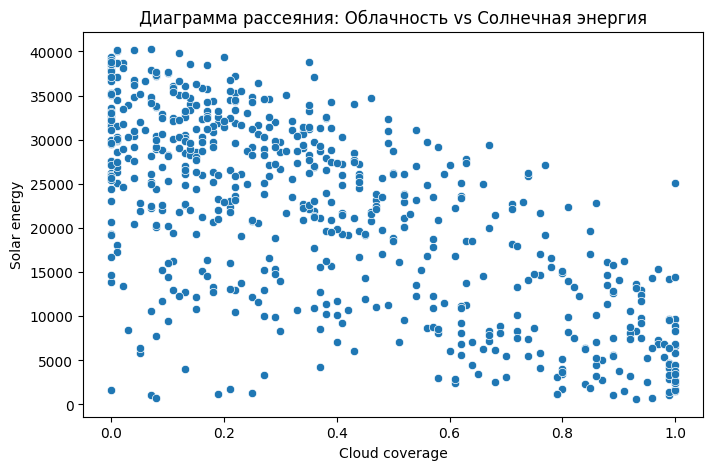

In [21]:
# 5.4. Диаграмма рассеяния облачности и солнечной энергии
# Показывает взаимосвязь между облачностью и уровнем солнечной энергии.
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Cloud coverage'], y=df['Solar energy'])
plt.title("Диаграмма рассеяния: Облачность vs Солнечная энергия")
plt.show()


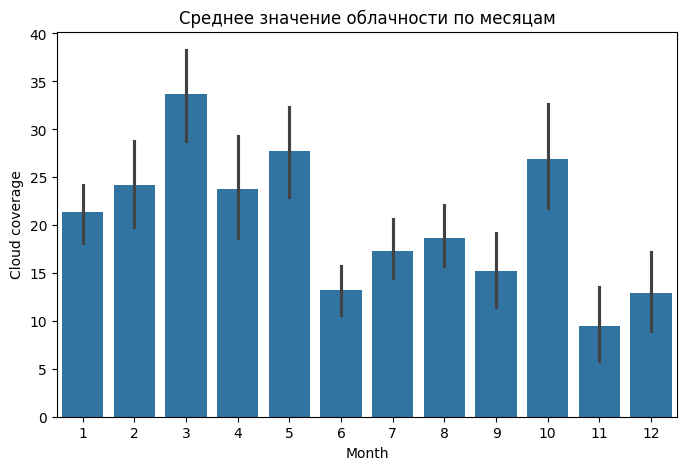

In [22]:
# 5.5. Среднее значение облачности по месяцам
#Позволяет проанализировать сезонные тренды облачности.
#Позволяет быстро увидеть, в какие месяцы облачность выше или ниже.
plt.figure(figsize=(8, 5))
sns.barplot(x=df['Month'], y=df['Cloud coverage'], estimator=sum)
plt.title("Среднее значение облачности по месяцам")
plt.show()


In [23]:
from sklearn.feature_selection import VarianceThreshold

# Оставляем только числовые признаки
numeric_features = df.select_dtypes(include=["number"])

# Удаляем признаки с дисперсией ниже 0.01
selector = VarianceThreshold(threshold=0.01)
df_var = selector.fit_transform(numeric_features)

# Получаем оставшиеся названия признаков
selected_features = numeric_features.columns[selector.get_support()]
df_selected = df[selected_features]


In [24]:
from sklearn.feature_selection import SelectKBest, f_regression

# Убираем столбец с датами и выбираем только числовые признаки
X = df.select_dtypes(include=["number"]).drop(columns=["Solar energy"])  
y = df["Solar energy"]  # Целевая переменная

# Отбор 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Выводим выбранные признаки
selected_features = X.columns[selector.get_support()]
print("Выбранные признаки:", selected_features)


Выбранные признаки: Index(['Cloud coverage', 'Visibility', 'Temperature', 'Relative humidity',
       'Wind speed'],
      dtype='object')


In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X, y)

selected_features = X.columns[rfe.support_]
print("Новые лучшие признаки:", selected_features)



Новые лучшие признаки: Index(['Cloud coverage', 'Temperature', 'Dew point', 'Station pressure',
       'Altimeter'],
      dtype='object')


In [26]:
df["Temp_Cloud"] = df["Temperature"] * df["Cloud coverage"]
print("\nDataFrame с добавленным признаком 'Temp_Cloud':")
df


DataFrame с добавленным признаком 'Temp_Cloud':


Date  Cloud coverage  Visibility  Temperature  Dew point  \
0   2016-02-01            0.10        9.45         3.11       0.32   
1   2016-02-02            0.80        3.94         6.99       6.22   
2   2016-02-03            0.87        8.70         1.62       0.02   
3   2016-02-04            0.37       10.00        -2.47      -5.89   
4   2016-02-05            0.52        9.21        -2.00      -4.15   
..         ...             ...         ...          ...        ...   
632 2017-10-25            0.23       10.00         5.87       2.89   
633 2017-10-26            0.01       10.00        10.59       5.32   
634 2017-10-27            0.89       10.00         5.79       0.04   
635 2017-10-28            0.99        9.67         3.43      -0.11   
636 2017-10-29            0.58       10.00         4.96      -0.90   

     Relative humidity  Wind speed  Station pressure  Altimeter  Solar energy  \
0                79.46        4.70             29.23      30.02         20256   
1                93.60       13.29             28.91      29.70          1761   
2                85.00       16.73             29.03      29.82          2775   
3                74.52        9.46             29.46      30.26         28695   
4                82.03        5.92             29.55      30.35          9517   
..                 ...         ...               ...        ...           ...   
632              82.33        5.56             29.04      29.83         13737   
633              72.74        9.61             28.97      29.76         27465   
634              67.37       13.62             29.08      29.87         15797   
635              77.87        9.67             29.15      29.94          6400   
636              67.58        5.53             29.07      29.86          8537   

     Month  Temp_Cloud  
0        2      0.3110  
1        2      5.5920  
2        2      1.4094  
3        2     -0.9139  
4        2     -1.0400  
..     ...         ...  
632     10      1.3501  
633     10      0.1059  
634     10      5.1531  
635     10      3.3957  
636     10      2.8768  

[637 rows x 12 columns]

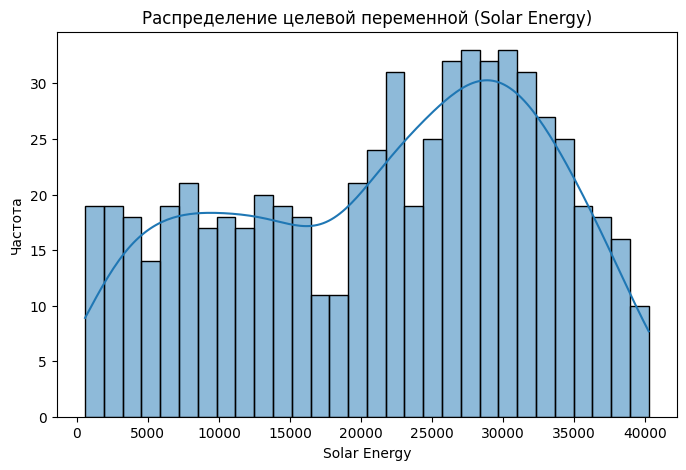

In [27]:
# 7
plt.figure(figsize=(8, 5))
sns.histplot(df["Solar energy"], bins=30, kde=True)
plt.title("Распределение целевой переменной (Solar Energy)")
plt.xlabel("Solar Energy")
plt.ylabel("Частота")
plt.show()

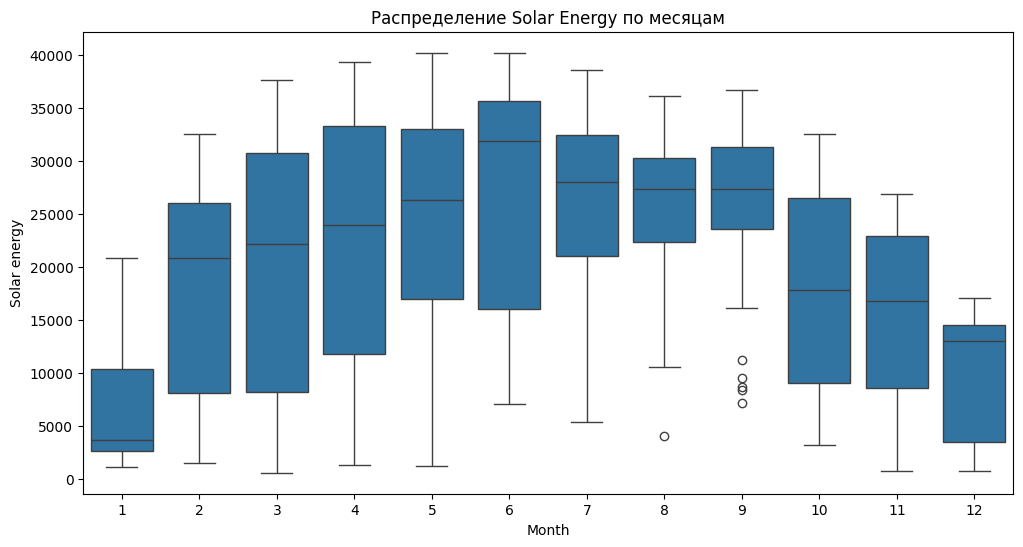

In [28]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["Month"], y=df["Solar energy"])
plt.title("Распределение Solar Energy по месяцам")
plt.show()


In [29]:
#8
from sklearn.model_selection import train_test_split
df = df.drop(columns=["Date"])
df = df.drop(columns=["Month"])
y = df["Solar energy"]
# Удалим целевую переменную
X = df.drop(columns=["Solar energy"])


# Разбиение (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Вывод размеров получившихся выборок
print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")
print("Обучающая выборка X:")
print(X_train)
print("\nТестовая выборка X:")
print(X_test)
print("\nОбучающая выборка y:")
print(y_train)
print("\nТестовая выборка y:")
print(y_test)


Размер X_train: (509, 9)
Размер X_test: (128, 9)
Размер y_train: (509,)
Размер y_test: (128,)
Обучающая выборка X:
     Cloud coverage  Visibility  Temperature  Dew point  Relative humidity  \
596            0.51        9.54        21.65      19.60              86.48   
327            0.99        4.35         3.37       2.59              93.07   
362            0.86        9.79        -0.89      -3.04              83.23   
231            0.00       10.00        21.45      14.17              65.31   
210            0.03        9.46        25.51      22.76              81.85   
..              ...         ...          ...        ...                ...   
71             0.00        9.96         5.66      -2.00              57.98   
106            0.94        9.99        12.06       8.45              75.51   
270            0.05        8.69        13.19      11.15              84.47   
435            0.43        9.99        10.52       6.62              74.04   
102            0.32        

In [30]:
# Лабораторная работа 2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Модели машинного обучения
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold
from sklearn.neural_network import MLPRegressor
cv = KFold(n_splits=5, shuffle=True, random_state=42)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
# Knn
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=cv, scoring='r2', n_jobs=-1)
knn_grid.fit(X_train, y_train)
print("Best KNN:", knn_grid.best_params_, "Best R²:", knn_grid.best_score_)

Best KNN: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'} Best R²: 0.5997970934180643


In [33]:
# Дерево решений
dt_params = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=cv, scoring='r2', n_jobs=-1)
dt_grid.fit(X_train, y_train)
print("Best Decision Tree:", dt_grid.best_params_, "Best R²:", dt_grid.best_score_)


Best Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10} Best R²: 0.5280947664997903


In [34]:
# Случайный лес
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=cv, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best Random Forest:", rf_grid.best_params_, "Best R²:", rf_grid.best_score_)

Best Random Forest: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 300} Best R²: 0.6187133517738269


In [35]:
# Градиентный бустинг
cat_params = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8]
}
cat_grid = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42), cat_params, cv=cv, scoring='r2', n_jobs=-1, n_iter=10)
cat_grid.fit(X_train, y_train)
print("Best CatBoost:", cat_grid.best_params_, "Best R²:", cat_grid.best_score_)

Best CatBoost: {'learning_rate': 0.05, 'iterations': 500, 'depth': 4} Best R²: 0.6299719921075985


In [36]:
# Нейронная сеть
mlp_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp_grid = RandomizedSearchCV(MLPRegressor(max_iter=5500, random_state=42), mlp_params, cv=cv, scoring='r2', n_jobs=-1, n_iter=10)
mlp_grid.fit(X_train, y_train)
print("Best MLP:", mlp_grid.best_params_, "Best R²:", mlp_grid.best_score_)


Best MLP: {'hidden_layer_sizes': (50, 50), 'alpha': 0.01, 'activation': 'relu'} Best R²: 0.5965653040697775


c:\Users\Cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5500) reached and the optimization hasn't converged yet.
  warnings.warn(


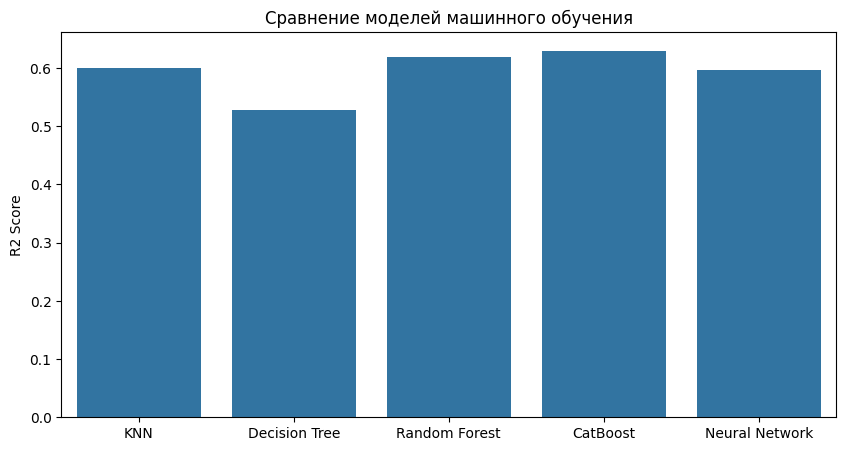

In [37]:
# Сравнение моделей
models = ["KNN", "Decision Tree", "Random Forest", "CatBoost", "Neural Network"]
scores = [
    knn_grid.best_score_,
    dt_grid.best_score_,
    rf_grid.best_score_,
    cat_grid.best_score_,
    mlp_grid.best_score_
]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=scores)
plt.ylabel("R2 Score")
plt.title("Сравнение моделей машинного обучения")
plt.show()


In [38]:
# Лабораторная работа №3 - Оценка моделей
knn_best = knn_grid.best_estimator_
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
cat_best = cat_grid.best_estimator_
mlp_best = mlp_grid.best_estimator_
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

models = {'KNN': knn_best, 'Decision Tree': dt_best, 'Random Forest': rf_best, 'CatBoost': cat_best, 'MLP': mlp_best}

for name, model in models.items():
    results = evaluate_model(model, X_test, y_test)
    print(f"{name} Evaluation: {results}")



KNN Evaluation: {'MAE': 5624.312844378996, 'MSE': 52628541.95378907, 'RMSE': 7254.553187742789, 'MAPE': 57.016212798366915, 'R2': 0.5205766248191097}
Decision Tree Evaluation: {'MAE': 6544.274212495669, 'MSE': 72505216.39614122, 'RMSE': 8514.999494782205, 'MAPE': 64.36422779585003, 'R2': 0.33950867205516044}
Random Forest Evaluation: {'MAE': 5957.481368202981, 'MSE': 57083326.41963124, 'RMSE': 7555.350846891973, 'MAPE': 58.33936689696595, 'R2': 0.4799954548867801}
CatBoost Evaluation: {'MAE': 5757.159191346015, 'MSE': 56801877.489929676, 'RMSE': 7536.70203006127, 'MAPE': 50.9276005052821, 'R2': 0.48255933355051084}
MLP Evaluation: {'MAE': 5387.200249664025, 'MSE': 49763833.12361723, 'RMSE': 7054.348525811383, 'MAPE': 47.60781980960901, 'R2': 0.5466728897978624}


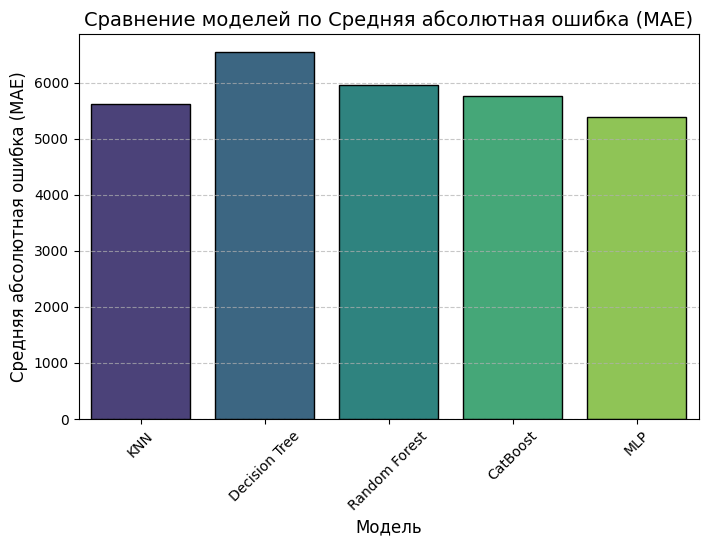

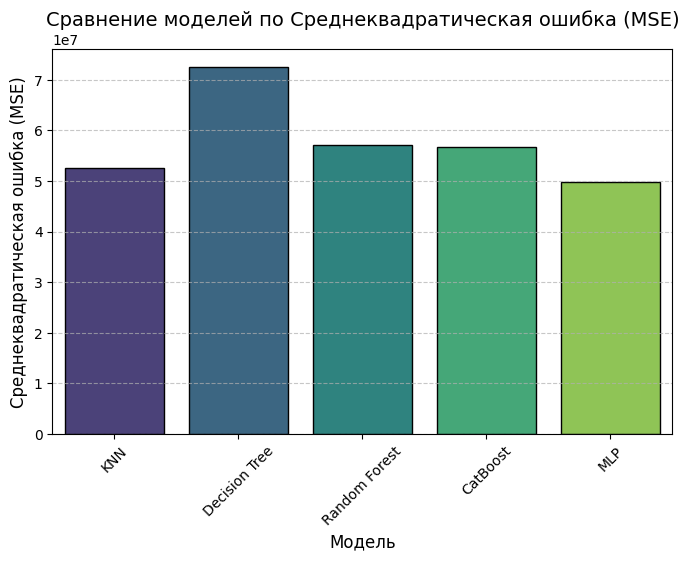

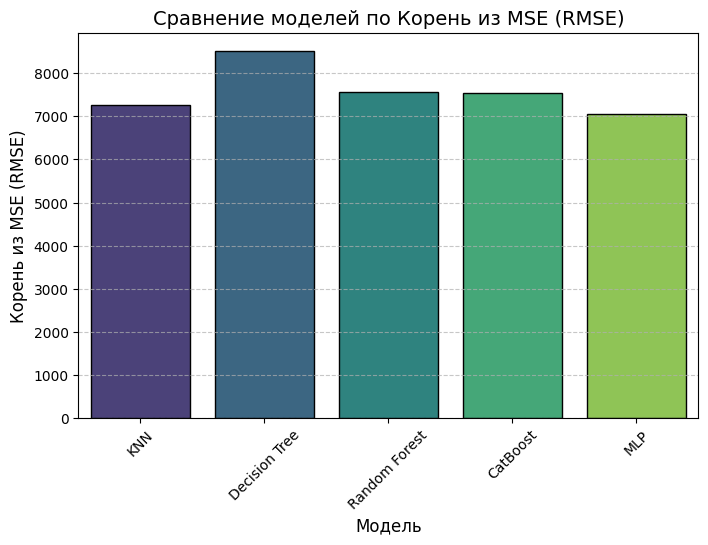

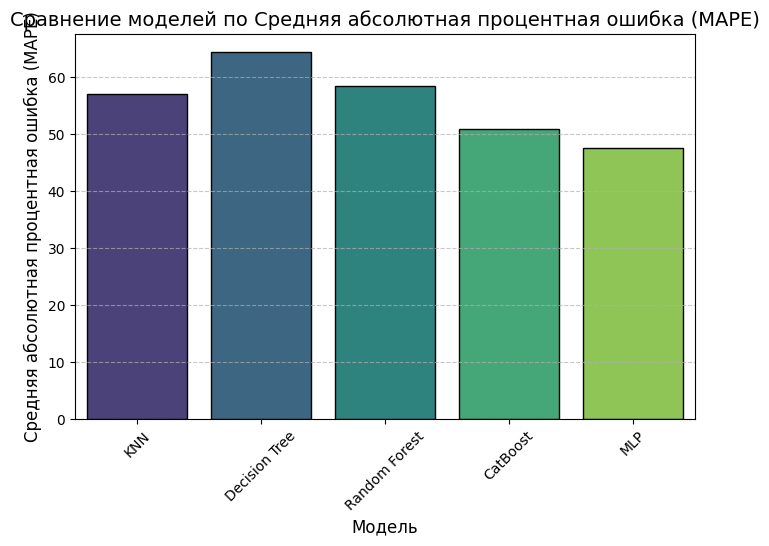

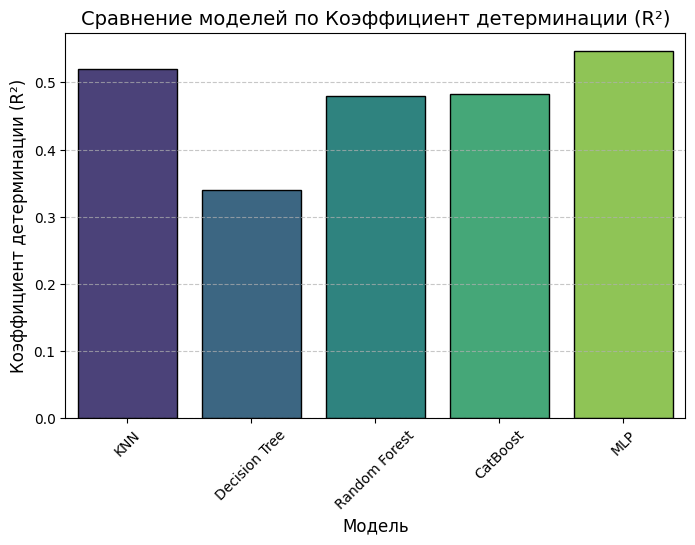

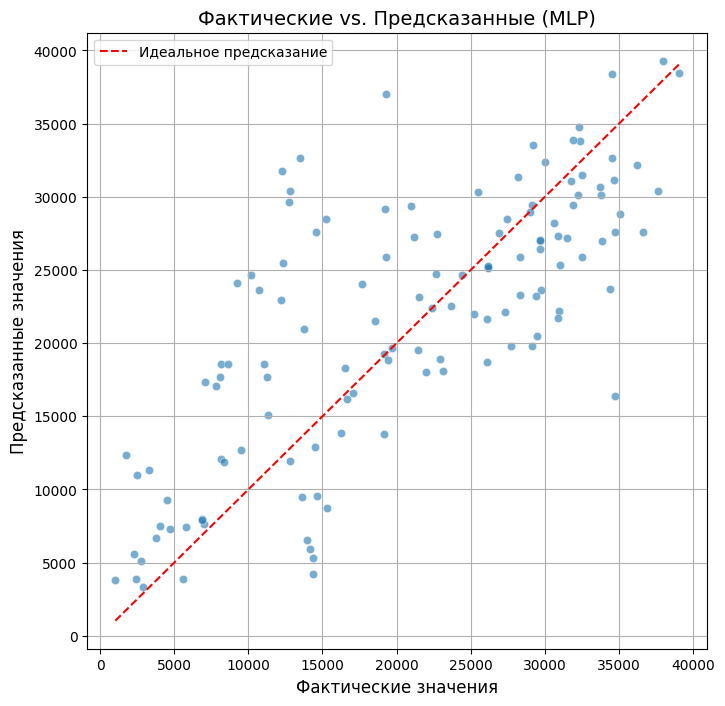

In [39]:
# Визуализация результатов
# Словарь для хранения результатов
metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Оценка каждой модели
for name, model in models.items():
    results = evaluate_model(model, X_test, y_test)
    metrics['Model'].append(name)
    for key in results:
        metrics[key].append(results[key])

# Преобразование в DataFrame
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

# Названия метрик и их описания для графиков
metric_labels = {
    'MAE': 'Средняя абсолютная ошибка (MAE)',
    'MSE': 'Среднеквадратическая ошибка (MSE)',
    'RMSE': 'Корень из MSE (RMSE)',
    'MAPE': 'Средняя абсолютная процентная ошибка (MAPE)',
    'R2': 'Коэффициент детерминации (R²)'
}

# Отображение каждого графика отдельно
for metric in metrics_df.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=metrics_df.index, 
        y=metrics_df[metric], 
        hue=metrics_df.index,  # Добавляем hue
        palette='viridis', 
        edgecolor='black',
        legend=False  # Отключаем легенду, так как цвета соответствуют x
    )
    plt.title(f'Сравнение моделей по {metric_labels[metric]}', fontsize=14)
    plt.xlabel("Модель", fontsize=12)
    plt.ylabel(metric_labels[metric], fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Визуализация фактических vs предсказанных значений для лучшей модели (по R²)
best_model_name = metrics_df.sort_values(by='R2', ascending=False).index[0]
best_model = models[best_model_name]

y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Идеальное предсказание")
plt.xlabel("Фактические значения", fontsize=12)
plt.ylabel("Предсказанные значения", fontsize=12)
plt.title(f"Фактические vs. Предсказанные ({best_model_name})", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# Лабораторная работа №4
df = df.drop(columns=["Altimeter"])
df = df.drop(columns=["Temp_Cloud"])
y = df["Solar energy"]
X = df.drop(columns=["Solar energy"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
# Knn

knn_params = {

    'n_neighbors': [3, 5, 7, 9],

    'weights': ['uniform', 'distance'],

    'metric': ['euclidean', 'manhattan']

}

knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=cv, scoring='r2', n_jobs=-1)

knn_grid.fit(X_train, y_train)

print("Best KNN:", knn_grid.best_params_, "Best R²:", knn_grid.best_score_)

# Дерево решений

dt_params = {

    'max_depth': [3, 5, 10, 15],

    'min_samples_split': [2, 5, 10],

    'min_samples_leaf': [1, 2, 5]

}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=cv, scoring='r2', n_jobs=-1)

dt_grid.fit(X_train, y_train)

print("Best Decision Tree:", dt_grid.best_params_, "Best R²:", dt_grid.best_score_)

# Случайный лес

rf_params = {

    'n_estimators': [100, 200, 300],

    'max_depth': [5, 10, 15],

    'min_samples_split': [2, 5, 10]

}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=cv, scoring='r2', n_jobs=-1)

rf_grid.fit(X_train, y_train)

print("Best Random Forest:", rf_grid.best_params_, "Best R²:", rf_grid.best_score_)

# Градиентный бустинг

cat_params = {

    'iterations': [100, 500, 1000],

    'learning_rate': [0.01, 0.05, 0.1],

    'depth': [4, 6, 8]

}

cat_grid = RandomizedSearchCV(CatBoostRegressor(verbose=0, random_state=42), cat_params, cv=cv, scoring='r2', n_jobs=-1, n_iter=10)

cat_grid.fit(X_train, y_train)

print("Best CatBoost:", cat_grid.best_params_, "Best R²:", cat_grid.best_score_)

# Нейронная сеть

mlp_params = {

    'hidden_layer_sizes': [(50,), (100,), (50, 50)],

    'activation': ['relu', 'tanh'],

    'alpha': [0.0001, 0.001, 0.01]

}

mlp_grid = RandomizedSearchCV(MLPRegressor(max_iter=5500, random_state=42), mlp_params, cv=cv, scoring='r2', n_jobs=-1, n_iter=10)

mlp_grid.fit(X_train, y_train)

print("Best MLP:", mlp_grid.best_params_, "Best R²:", mlp_grid.best_score_)


Best KNN: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'} Best R²: 0.6196716650088704
Best Decision Tree: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2} Best R²: 0.5323934678992611
Best Random Forest: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300} Best R²: 0.6170520486671887
Best CatBoost: {'learning_rate': 0.1, 'iterations': 100, 'depth': 4} Best R²: 0.6338589386177222
Best MLP: {'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'} Best R²: 0.599421448322674


c:\Users\Cyber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [42]:
knn_best = knn_grid.best_estimator_
dt_best = dt_grid.best_estimator_
rf_best = rf_grid.best_estimator_
cat_best = cat_grid.best_estimator_
mlp_best = mlp_grid.best_estimator_
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

models = {'KNN': knn_best, 'Decision Tree': dt_best, 'Random Forest': rf_best, 'CatBoost': cat_best, 'MLP': mlp_best}

for name, model in models.items():
    results = evaluate_model(model, X_test, y_test)
    print(f"{name} Evaluation: {results}")




KNN Evaluation: {'MAE': 5835.405381944443, 'MSE': 53740114.38589892, 'RMSE': 7330.764925019688, 'MAPE': 58.5663284098924, 'R2': 0.510450678186804}
Decision Tree Evaluation: {'MAE': 6493.928590268865, 'MSE': 72835368.32960889, 'RMSE': 8534.36396749101, 'MAPE': 68.515974630844, 'R2': 0.33650112998028125}
Random Forest Evaluation: {'MAE': 5927.2095759407, 'MSE': 57188428.24294427, 'RMSE': 7562.303104408356, 'MAPE': 58.97246896919571, 'R2': 0.479038022493638}
CatBoost Evaluation: {'MAE': 5708.566704537767, 'MSE': 54062158.898487434, 'RMSE': 7352.697389291051, 'MAPE': 54.82158845379628, 'R2': 0.5075169912281335}
MLP Evaluation: {'MAE': 5403.654458672114, 'MSE': 49374911.407011606, 'RMSE': 7026.72835728062, 'MAPE': 48.65273384254829, 'R2': 0.5502157993130061}


     Actual           KNN  Decision Tree  Random Forest      CatBoost  \
260    9249  24074.888889   26815.812500   25768.694948  25136.946444   
228   11245  19285.777778   23850.414634   22524.888923  20370.718004   
31     2916   4161.888889    3486.750000    3462.178747   3128.298079   
507    8129  14797.444444   12647.027778   15647.825285  14103.725094   
503   10744  24951.444444   26815.812500   25113.700365  26388.280868   
30    30943  25991.777778   26815.812500   22591.931292  19366.311374   
628   14594  26105.111111   31328.469799   28806.278784  28205.086606   
110   34548  31463.888889   26815.812500   29959.243568  31053.634828   
247   22642  28322.888889   26815.812500   27137.551359  26661.529619   
522   10177  27936.111111   23850.414634   23569.592880  25334.143360   

              MLP  
260  23255.574334  
228  18284.454881  
31    2725.817998  
507  17314.817231  
503  22941.544811  
30   21864.073956  
628  27500.037509  
110  32879.829027  
247  24398.66272

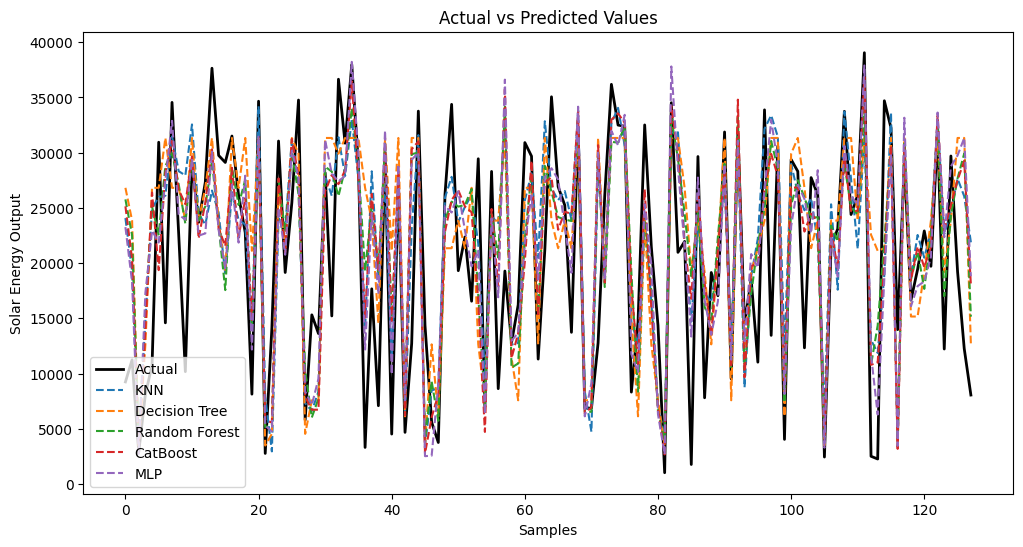

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Список моделей и их названий
models = {
    "KNN": knn_best,
    "Decision Tree": dt_best,
    "Random Forest": rf_best,
    "CatBoost": cat_best,
    "MLP": mlp_best
}

# Создаем DataFrame для предсказанных значений
predictions_df = pd.DataFrame({"Actual": y_test})

# Генерируем предсказания для каждой модели
for name, model in models.items():
    predictions_df[name] = model.predict(X_test)

# Выводим первые 10 строк предсказаний
print(predictions_df.head(10))

# Визуализация предсказаний
plt.figure(figsize=(12, 6))
plt.plot(predictions_df["Actual"].values, label="Actual", color="black", linewidth=2)

for name in models.keys():
    plt.plot(predictions_df[name].values, label=name, linestyle="--")

plt.legend()
plt.title("Actual vs Predicted Values")
plt.xlabel("Samples")
plt.ylabel("Solar Energy Output")
plt.show()


In [44]:
import pickle

# Список моделей и их названий
models = {
    "KNN": knn_best,
    "Decision_Tree": dt_best,
    "Random_Forest": rf_best,
    "CatBoost": cat_best,
    "MLP": mlp_best
}

# Сохраняем каждую модель в файл .pkl
for name, model in models.items():
    with open(f"{name}.pkl", "wb") as file:
        pickle.dump(model, file)

print("Все модели сохранены в формате .pkl!")


Все модели сохранены в формате .pkl!


In [45]:
df

Cloud coverage  Visibility  Temperature  Dew point  Relative humidity  \
0              0.10        9.45         3.11       0.32              79.46   
1              0.80        3.94         6.99       6.22              93.60   
2              0.87        8.70         1.62       0.02              85.00   
3              0.37       10.00        -2.47      -5.89              74.52   
4              0.52        9.21        -2.00      -4.15              82.03   
..              ...         ...          ...        ...                ...   
632            0.23       10.00         5.87       2.89              82.33   
633            0.01       10.00        10.59       5.32              72.74   
634            0.89       10.00         5.79       0.04              67.37   
635            0.99        9.67         3.43      -0.11              77.87   
636            0.58       10.00         4.96      -0.90              67.58   

     Wind speed  Station pressure  Solar energy  
0          4.70             29.23         20256  
1         13.29             28.91          1761  
2         16.73             29.03          2775  
3          9.46             29.46         28695  
4          5.92             29.55          9517  
..          ...               ...           ...  
632        5.56             29.04         13737  
633        9.61             28.97         27465  
634       13.62             29.08         15797  
635        9.67             29.15          6400  
636        5.53             29.07          8537  

[637 rows x 8 columns]